# JPX Tokyo Stock Exchange Prediction

 Clara-Marie JARADE

https://www.kaggle.com/competitions/jpx-tokyo-stock-exchange-prediction/overview
Explore the Tokyo market with your data science skills

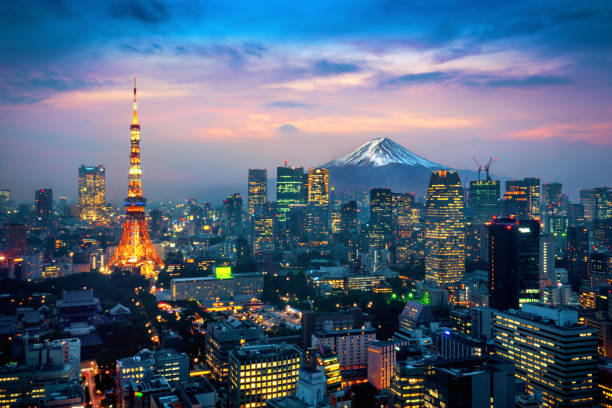

# PART 1 - Introduction

 We are a Japanese investment consulting firm and we are here today to present you our latest recommendations.  
As you know with the inflationary period that we are experiencing, investing your money has become essential. As some people say "to become rich you have to make money even while sleeping" and we are going to help you do!

For this we used a database bringing together stock market information on 2000 Japan stocks over the period from 2017 to 2021. From this information we calculated a key investment indicator which is the Return on Investment. By classifying each action a, we created a new sample of 20 actions with the best ROI. However, the objective is to concentrate our investment on the best stock which promises the best return among all stocks.

Finally, we will predict the prices of these stocks for the year 2022, so we can observe if certain trends are emerging and which stocks will perform based on our machine learning model.

# PART 2 - Data understanding

In [2]:
# import librairies

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random

import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics

import statsmodels.api as sm


In [3]:
# import files 

df_price = pd.read_csv('stock_prices.csv') 

df_stock = pd.read_csv('stock_list.csv')

In [4]:
# prinicipal informations of both files

In [5]:
print(df_price.shape)
df_price.head()

(2332531, 12)


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026


In [6]:
print(df_stock.shape)
df_stock.head()

(4417, 16)


,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
0,1301,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,1.092828e+07,3.365911e+10,True
1,1305,20211230,Daiwa ETF-TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2097.0,3.634636e+09,7.621831e+12,False
2,1306,20211230,NEXT FUNDS TOPIX Exchange Traded Fund,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2073.5,7.917718e+09,1.641739e+13,False
3,1308,20211230,Nikko Exchange Traded Index Fund TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2053.0,3.736943e+09,7.671945e+12,False
4,1309,20211230,NEXT FUNDS ChinaAMC SSE50 Index Exchange Trade...,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,44280.0,7.263200e+04,3.216145e+09,False


# PART 3 - Cleaning

## A - Cleaning tableau stock price

In [7]:
# show where are missing values

In [8]:
df_price.isnull().sum()

RowId                     0
Date                      0
SecuritiesCode            0
Open                   7608
High                   7608
Low                    7608
Close                  7608
Volume                    0
AdjustmentFactor          0
ExpectedDividend    2313666
SupervisionFlag           0
Target                  238
dtype: int64

In [9]:
# drop ExpectedDividend columns with a lot of missing value
df_price_clean = df_price.drop('ExpectedDividend', axis=1)


# drop columns without important information for our interpretation 
df_price_clean_light = df_price_clean.drop(['AdjustmentFactor', 'SupervisionFlag', 'Target'], axis=1)

#drop rows with missing value fort open/high/low/close rather than put the mean to have a more precise model 
df_price_clean_light = df_price_clean_light.dropna()
df_price_clean_light.isnull().sum()

RowId             0
Date              0
SecuritiesCode    0
Open              0
High              0
Low               0
Close             0
Volume            0
dtype: int64

In [10]:
print(df_price_clean_light.shape)
df_price_clean_light

(2324923, 8)


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800
...,...,...,...,...,...,...,...,...
2332526,20211203_9990,2021-12-03,9990,514.0,528.0,513.0,528.0,44200
2332527,20211203_9991,2021-12-03,9991,782.0,794.0,782.0,794.0,35900
2332528,20211203_9993,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200
2332529,20211203_9994,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500


## B - Cleaning stock list

In [11]:
description = df_price_clean_light.describe()

description_rounded = description.round(2)

description_rounded

,SecuritiesCode,Open,High,Low,Close,Volume
count,2324923.00,2324923.00,2324923.00,2324923.00,2324923.00,2.324923e+06
mean,5895.57,2594.51,2626.54,2561.23,2594.02,6.942008e+05
std,2403.24,3577.19,3619.36,3533.49,3576.54,3.917450e+06
min,1301.00,14.00,15.00,13.00,14.00,1.000000e+02
25%,3891.00,1022.00,1035.00,1009.00,1022.00,3.070000e+04
50%,6240.00,1812.00,1834.00,1790.00,1811.00,1.079000e+05
75%,7965.00,3030.00,3070.00,2995.00,3030.00,4.041000e+05
max,9997.00,109950.00,110500.00,107200.00,109550.00,6.436540e+08


In [12]:
#we keep the columns that interest us
df_stock_clean = df_stock[['SecuritiesCode', 'Name', '17SectorName']]
df_stock_clean.columns = ['SecuritiesCode', 'Name', 'SectorName']
df_stock_clean['Name'] = df_stock_clean['Name'].str.strip().str.lower().str.capitalize()
df_stock_clean['SectorName'] = df_stock_clean['SectorName'].str.strip().str.lower().str.capitalize()
df_stock_clean

/var/folders/xn/fytvlt_d4q7cgl95f5y2q98c0000gn/T/ipykernel_90886/1740854404.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_clean['Name'] = df_stock_clean['Name'].str.strip().str.lower().str.capitalize()
/var/folders/xn/fytvlt_d4q7cgl95f5y2q98c0000gn/T/ipykernel_90886/1740854404.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_clean['SectorName'] = df_stock_clean['SectorName'].str.strip().str.lower().str.capitalize()


,SecuritiesCode,Name,SectorName
0,1301,"Kyokuyo co.,ltd.",Foods
1,1305,Daiwa etf-topix,-
2,1306,Next funds topix exchange traded fund,-
3,1308,Nikko exchange traded index fund topix,-
4,1309,Next funds chinaamc sse50 index exchange trade...,-
...,...,...,...
4412,9994,Yamaya corporation,Retail trade
4413,9995,"Glosel co.,ltd.",Commercial & wholesale trade
4414,9996,"Satoh&co.,ltd.",Commercial & wholesale trade
4415,9997,"Belluna co.,ltd.",Retail trade


## C - Merge stock list and stock price

In [13]:
# Fusion of our two list 
df_merged = pd.merge(df_stock_clean, df_price_clean_light, on='SecuritiesCode', how='inner')
df_merged['Date'] = pd.to_datetime(df_merged['Date'])
df_merged

,SecuritiesCode,Name,SectorName,RowId,Date,Open,High,Low,Close,Volume
0,1301,"Kyokuyo co.,ltd.",Foods,20170104_1301,2017-01-04,2734.0,2755.0,2730.0,2742.0,31400
1,1301,"Kyokuyo co.,ltd.",Foods,20170105_1301,2017-01-05,2743.0,2747.0,2735.0,2738.0,17900
2,1301,"Kyokuyo co.,ltd.",Foods,20170106_1301,2017-01-06,2734.0,2744.0,2720.0,2740.0,19900
3,1301,"Kyokuyo co.,ltd.",Foods,20170110_1301,2017-01-10,2745.0,2754.0,2735.0,2748.0,24200
4,1301,"Kyokuyo co.,ltd.",Foods,20170111_1301,2017-01-11,2748.0,2752.0,2737.0,2745.0,9300
...,...,...,...,...,...,...,...,...,...,...
2324918,9997,"Belluna co.,ltd.",Retail trade,20211129_9997,2021-11-29,678.0,679.0,665.0,668.0,320800
2324919,9997,"Belluna co.,ltd.",Retail trade,20211130_9997,2021-11-30,670.0,689.0,667.0,667.0,296300
2324920,9997,"Belluna co.,ltd.",Retail trade,20211201_9997,2021-12-01,661.0,688.0,660.0,685.0,339100
2324921,9997,"Belluna co.,ltd.",Retail trade,20211202_9997,2021-12-02,681.0,692.0,680.0,684.0,342900


In [14]:
#checking that no data is missing
df_merged.isnull().sum()

SecuritiesCode    0
Name              0
SectorName        0
RowId             0
Date              0
Open              0
High              0
Low               0
Close             0
Volume            0
dtype: int64

# PART 4 - Sampling

## A - Choose 20 stocks with the same data shape

In [15]:
#we create a list with 20 stocks 
liste_n = ['Kyokuyo co.,ltd.',
            'Nippon suisan kaisha,ltd.',
            'Maruha nichiro corporation',
            'Kaneko seeds co.,ltd.',
            'Sakata seed corporation',
            'Hokuto corporation',
            'West holdings corporation',
            'Sho-bond holdings co.,ltd.',
            'Mirait holdings corporation',
            'Tama home co.,ltd.',
            'Nippon aqua co.,ltd.',
            'Robot home,inc.',
            'Nittetsu mining co.,ltd.',
            'Mitsui matsushima holdings co.,ltd.',
            'Inpex corporation',
            'Japan petroleum exploration co.,ltd.',
            'K&o energy group inc.',
            'Daiseki eco.solution co.,ltd.',
            'Dai-ichi cutter kogyo k.k.',
            'Hazama ando corporation',]

In [16]:
# New DataFrame to store filtered data from the 20 actions (our list)
df_new = pd.DataFrame()
 
# Loop to filter and group the data from the 20 actions
for action in liste_n:
    #Filter to do a specific action
    donnees_action = df_merged[df_merged["Name"] == action]  # replace the column actions's name 
    # group in a new data frame
    df_new = pd.concat([df_new, donnees_action])
 
# Verification of the New Data Frame by displayinf the first and last rows
df_new  

,SecuritiesCode,Name,SectorName,RowId,Date,Open,High,Low,Close,Volume
0,1301,"Kyokuyo co.,ltd.",Foods,20170104_1301,2017-01-04,2734.0,2755.0,2730.0,2742.0,31400
1,1301,"Kyokuyo co.,ltd.",Foods,20170105_1301,2017-01-05,2743.0,2747.0,2735.0,2738.0,17900
2,1301,"Kyokuyo co.,ltd.",Foods,20170106_1301,2017-01-06,2734.0,2744.0,2720.0,2740.0,19900
3,1301,"Kyokuyo co.,ltd.",Foods,20170110_1301,2017-01-10,2745.0,2754.0,2735.0,2748.0,24200
4,1301,"Kyokuyo co.,ltd.",Foods,20170111_1301,2017-01-11,2748.0,2752.0,2737.0,2745.0,9300
...,...,...,...,...,...,...,...,...,...,...
27259,1719,Hazama ando corporation,Construction & materials,20211129_1719,2021-11-29,860.0,868.0,856.0,858.0,585200
27260,1719,Hazama ando corporation,Construction & materials,20211130_1719,2021-11-30,868.0,875.0,840.0,841.0,979500
27261,1719,Hazama ando corporation,Construction & materials,20211201_1719,2021-12-01,849.0,865.0,844.0,857.0,707400
27262,1719,Hazama ando corporation,Construction & materials,20211202_1719,2021-12-02,857.0,871.0,857.0,867.0,556500


## B - ROI

We decided to use the Return on Investissment (ROI) indicator to measure the profitability of capital invested over a given period.
We chose this indicator because it represents a key indicator for good portfolio management.

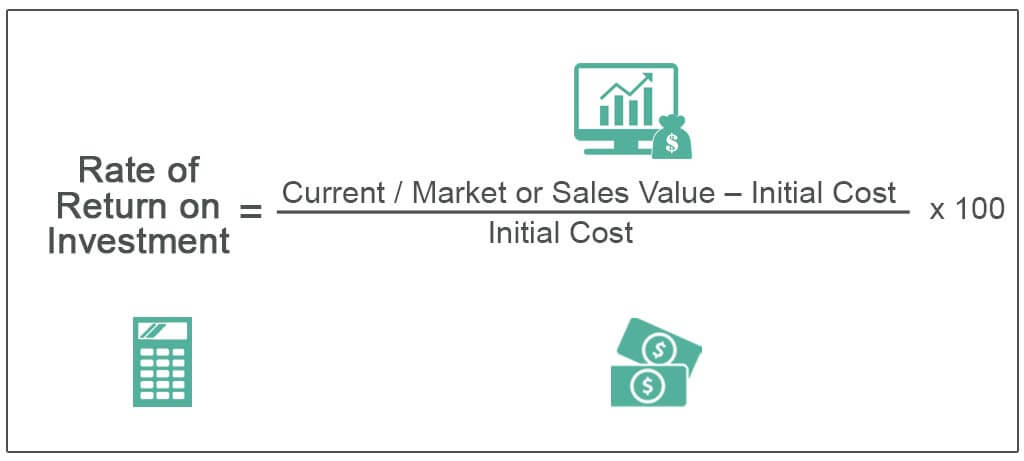


In [17]:
#convert columns date in datetime to use it, and creating new column to sort the data by month or by year
df_new['date'] = pd.to_datetime(df_new['Date'])
df_new['month'] = df_new['Date'].dt.month
df_new['year'] = df_new['Date'].dt.year

df_new

,SecuritiesCode,Name,SectorName,RowId,Date,Open,High,Low,Close,Volume,date,month,year
0,1301,"Kyokuyo co.,ltd.",Foods,20170104_1301,2017-01-04,2734.0,2755.0,2730.0,2742.0,31400,2017-01-04,1,2017
1,1301,"Kyokuyo co.,ltd.",Foods,20170105_1301,2017-01-05,2743.0,2747.0,2735.0,2738.0,17900,2017-01-05,1,2017
2,1301,"Kyokuyo co.,ltd.",Foods,20170106_1301,2017-01-06,2734.0,2744.0,2720.0,2740.0,19900,2017-01-06,1,2017
3,1301,"Kyokuyo co.,ltd.",Foods,20170110_1301,2017-01-10,2745.0,2754.0,2735.0,2748.0,24200,2017-01-10,1,2017
4,1301,"Kyokuyo co.,ltd.",Foods,20170111_1301,2017-01-11,2748.0,2752.0,2737.0,2745.0,9300,2017-01-11,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27259,1719,Hazama ando corporation,Construction & materials,20211129_1719,2021-11-29,860.0,868.0,856.0,858.0,585200,2021-11-29,11,2021
27260,1719,Hazama ando corporation,Construction & materials,20211130_1719,2021-11-30,868.0,875.0,840.0,841.0,979500,2021-11-30,11,2021
27261,1719,Hazama ando corporation,Construction & materials,20211201_1719,2021-12-01,849.0,865.0,844.0,857.0,707400,2021-12-01,12,2021
27262,1719,Hazama ando corporation,Construction & materials,20211202_1719,2021-12-02,857.0,871.0,857.0,867.0,556500,2021-12-02,12,2021


In [18]:
#group sotck by month and year
df_grouped = df_new.groupby(['Name', 'month', 'year'])['Close'].mean().reset_index()
df_grouped

,Name,month,year,Close
0,Dai-ichi cutter kogyo k.k.,1,2017,1012.631579
1,Dai-ichi cutter kogyo k.k.,1,2018,1985.684211
2,Dai-ichi cutter kogyo k.k.,1,2019,1789.894737
3,Dai-ichi cutter kogyo k.k.,1,2020,1822.421053
4,Dai-ichi cutter kogyo k.k.,1,2021,1419.526316
...,...,...,...,...
1195,West holdings corporation,12,2017,727.000000
1196,West holdings corporation,12,2018,1250.473684
1197,West holdings corporation,12,2019,1694.190476
1198,West holdings corporation,12,2020,4299.772727


In [19]:
#prepared variable to perform the ROI 

In [20]:
# we create a loop to see the close price of the first day and last day for each stocks 

In [21]:
first_month = df_grouped.groupby('Name')['month'].min().reset_index()
last_months = df_grouped.groupby('Name')['month'].max().reset_index()
df_first_last = pd.merge(first_month, last_months, on='Name', suffixes=('_first', '_last'))
df_filtered = pd.merge(df_grouped, df_first_last, on='Name')
df_filtered = df_filtered[(df_filtered['month'] == df_filtered['month_first']) | (df_filtered['month'] == df_filtered['month_last'])]

In [22]:
df_filtered_janvier_2017 = df_filtered[(df_filtered['year'] == 2017) & (df_filtered['month'] == 1)]
df_filtered_december_2021 = df_filtered[(df_filtered['year'] == 2017) & (df_filtered['month'] == 12)]

df_avg_janvier_2017 = df_filtered_janvier_2017.groupby('Name')['Close'].mean().reset_index()
df_avg_december_2021 = df_filtered_december_2021.groupby('Name')['Close'].mean().reset_index()

In [23]:
#show the close price for each stock on the first day

In [24]:
df_avg_janvier_2017

,Name,Close
0,Dai-ichi cutter kogyo k.k.,1012.631579
1,"Daiseki eco.solution co.,ltd.",1550.000000
2,Hazama ando corporation,786.105263
3,Hokuto corporation,2065.315789
4,Inpex corporation,1137.763158
5,"Japan petroleum exploration co.,ltd.",2582.210526
6,K&o energy group inc.,1781.473684
7,"Kaneko seeds co.,ltd.",1519.210526
8,"Kyokuyo co.,ltd.",2725.263158
9,Maruha nichiro corporation,3193.157895


In [25]:
#show the close price for each stock on the last day

In [26]:
df_avg_december_2021

,Name,Close
0,Dai-ichi cutter kogyo k.k.,1842.809524
1,"Daiseki eco.solution co.,ltd.",1416.380952
2,Hazama ando corporation,902.142857
3,Hokuto corporation,2028.000000
4,Inpex corporation,1338.119048
5,"Japan petroleum exploration co.,ltd.",2810.238095
6,K&o energy group inc.,1870.571429
7,"Kaneko seeds co.,ltd.",1726.857143
8,"Kyokuyo co.,ltd.",4066.190476
9,Maruha nichiro corporation,3364.047619


In [27]:
df_filtered_unique = df_filtered.drop_duplicates(subset=['Name', 'month'])  # delete duplicate 

#merged close price for the first date and the last date
df_pivot = df_filtered_unique.pivot(index='Name', columns='month', values='Close')
df_pivot['ROI'] = (df_pivot[df_pivot.columns[-1]] - df_pivot[df_pivot.columns[0]]) / df_pivot[df_pivot.columns[0]]

df_pivot

month,1,12,ROI
Name,,,
Dai-ichi cutter kogyo k.k.,1012.631579,1842.809524,0.819822
"Daiseki eco.solution co.,ltd.",1550.000000,1416.380952,-0.086206
Hazama ando corporation,786.105263,902.142857,0.147611
Hokuto corporation,2065.315789,2028.000000,-0.018068
Inpex corporation,1137.763158,1338.119048,0.176096
"Japan petroleum exploration co.,ltd.",2582.210526,2810.238095,0.088307
K&o energy group inc.,1781.473684,1870.571429,0.050014
"Kaneko seeds co.,ltd.",1519.210526,1726.857143,0.136681
"Kyokuyo co.,ltd.",2725.263158,4066.190476,0.492036


## C - Financial investigation

Based on the calcul of the Return on Invest for every stocks,we choose to pick the best one to continue our project : DAI-ICHI CUTTER KOGYO K.K.

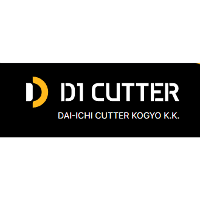


Dai-ichi Cutter Kogyo K.K. is a renowned Japanese company specializing in industrial cutting solutions. With a rich history spanning several decades, they are recognized for their expertise in manufacturing cutting tools and machinery for various industries worldwide. The company is known for its innovative approach, providing high-quality precision cutting solutions that cater to diverse customer needs. Their commitment to technological advancement and quality craftsmanship has solidified their position as a leader in the field of industrial cutting equipment.

In [28]:
#We do basic visualisation on the chosen stock

In [29]:
# we select only the rows with Dai-ichi cutter kogyo k.k.

df_max = df_new[df_new["Name"]=="Dai-ichi cutter kogyo k.k."]
df_max


,SecuritiesCode,Name,SectorName,RowId,Date,Open,High,Low,Close,Volume,date,month,year
24862,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20170104_1716,2017-01-04,998.0,1024.0,998.0,1023.0,42600,2017-01-04,1,2017
24863,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20170105_1716,2017-01-05,1019.0,1024.0,1014.0,1017.0,13600,2017-01-05,1,2017
24864,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20170106_1716,2017-01-06,1021.0,1026.0,1019.0,1022.0,17700,2017-01-06,1,2017
24865,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20170110_1716,2017-01-10,1019.0,1020.0,1011.0,1016.0,17500,2017-01-10,1,2017
24866,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20170111_1716,2017-01-11,1012.0,1034.0,1012.0,1030.0,14200,2017-01-11,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26058,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20211129_1716,2021-11-29,1314.0,1334.0,1293.0,1296.0,18900,2021-11-29,11,2021
26059,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20211130_1716,2021-11-30,1289.0,1332.0,1269.0,1269.0,16300,2021-11-30,11,2021
26060,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20211201_1716,2021-12-01,1299.0,1299.0,1271.0,1272.0,16300,2021-12-01,12,2021
26061,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20211202_1716,2021-12-02,1272.0,1296.0,1271.0,1273.0,12000,2021-12-02,12,2021


In [30]:
# we index the date for our tab instead of the rows numbers
df_max['date'] = pd.to_datetime(df_max['date'])
df_max = df_max.set_index('date')
df_max

/var/folders/xn/fytvlt_d4q7cgl95f5y2q98c0000gn/T/ipykernel_90886/1467713638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_max['date'] = pd.to_datetime(df_max['date'])


,SecuritiesCode,Name,SectorName,RowId,Date,Open,High,Low,Close,Volume,month,year
date,,,,,,,,,,,,
2017-01-04,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20170104_1716,2017-01-04,998.0,1024.0,998.0,1023.0,42600,1,2017
2017-01-05,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20170105_1716,2017-01-05,1019.0,1024.0,1014.0,1017.0,13600,1,2017
2017-01-06,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20170106_1716,2017-01-06,1021.0,1026.0,1019.0,1022.0,17700,1,2017
2017-01-10,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20170110_1716,2017-01-10,1019.0,1020.0,1011.0,1016.0,17500,1,2017
2017-01-11,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20170111_1716,2017-01-11,1012.0,1034.0,1012.0,1030.0,14200,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20211129_1716,2021-11-29,1314.0,1334.0,1293.0,1296.0,18900,11,2021
2021-11-30,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20211130_1716,2021-11-30,1289.0,1332.0,1269.0,1269.0,16300,11,2021
2021-12-01,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20211201_1716,2021-12-01,1299.0,1299.0,1271.0,1272.0,16300,12,2021


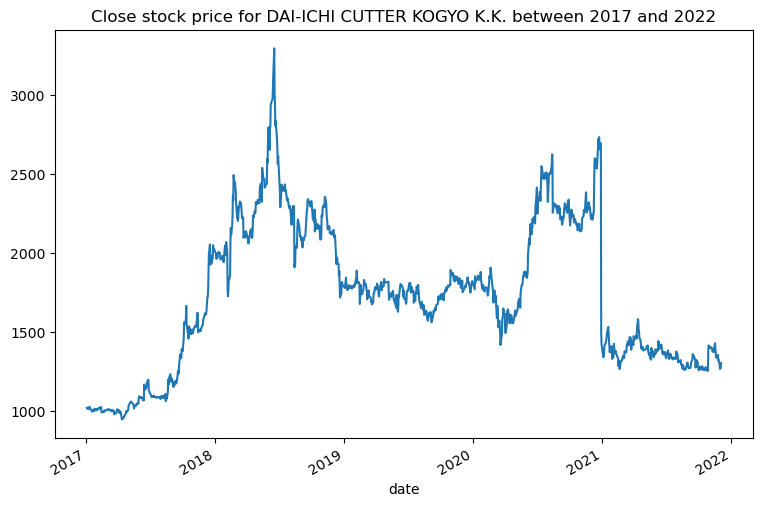

In [31]:
#visualisation of the close price for the stock 
df_max["Close"].plot(figsize=(9,6))
plt.title('Close stock price for DAI-ICHI CUTTER KOGYO K.K. between 2017 and 2022')
plt.show()

We can see a high spike in stock price in 2018 , so we want to zoom it 

Text(0.5, 1.0, 'Close stock price for DAI-ICHI CUTTER KOGYO K.K. in 2018')

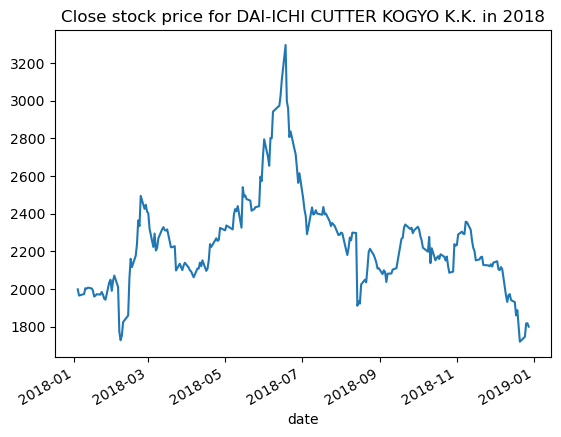

In [32]:
#visulaisation of the close stock price for 2018
df_max.loc["2018"]["Close"].plot()
plt.title('Close stock price for DAI-ICHI CUTTER KOGYO K.K. in 2018')


Text(0.5, 1.0, 'Close stock price for DAI-ICHI CUTTER KOGYO K.K. between 2017 and 2022')

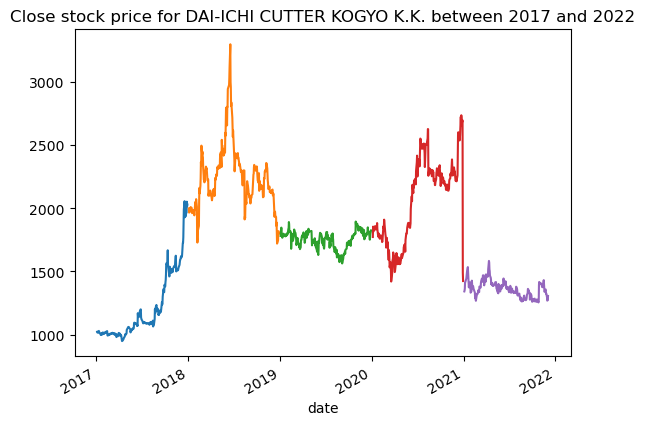

In [33]:
#visuliation of the close date for our stock with a different color for each year 
df_max["Close"].resample('Y').plot()
plt.title('Close stock price for DAI-ICHI CUTTER KOGYO K.K. between 2017 and 2022')

Text(0.5, 1.0, 'Trend of close stock price for DAI-ICHI CUTTER KOGYO K.K. by year')

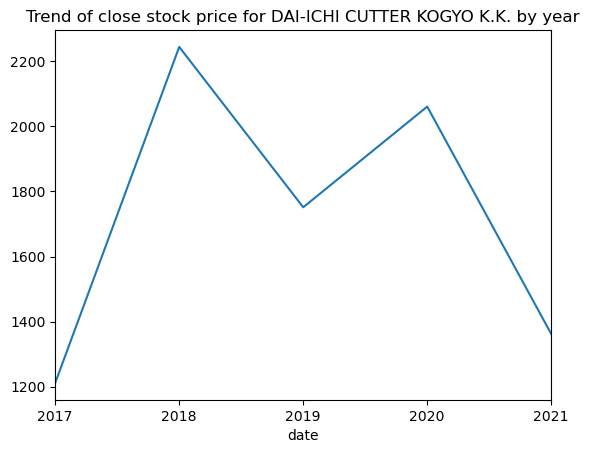

In [34]:
df_max["Close"].resample('Y').mean().plot()
plt.title('Trend of close stock price for DAI-ICHI CUTTER KOGYO K.K. by year')

Text(0.5, 1.0, 'Trend of close stock price for DAI-ICHI CUTTER KOGYO K.K. by month')

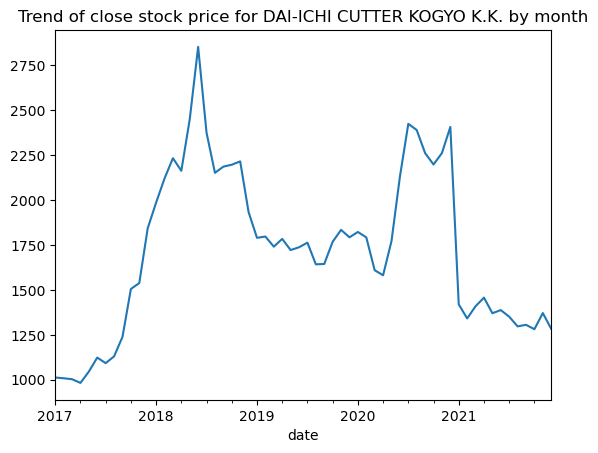

In [35]:
df_max["Close"].resample('M').mean().plot()
plt.title('Trend of close stock price for DAI-ICHI CUTTER KOGYO K.K. by month')

Text(0.5, 1.0, 'Trend of close stock price for DAI-ICHI CUTTER KOGYO K.K. by week')

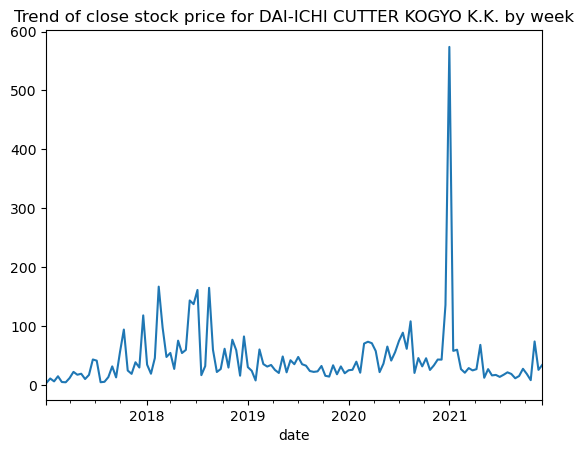

In [36]:
df_max["Close"].resample('2W').std().plot()
plt.title('Trend of close stock price for DAI-ICHI CUTTER KOGYO K.K. by week')

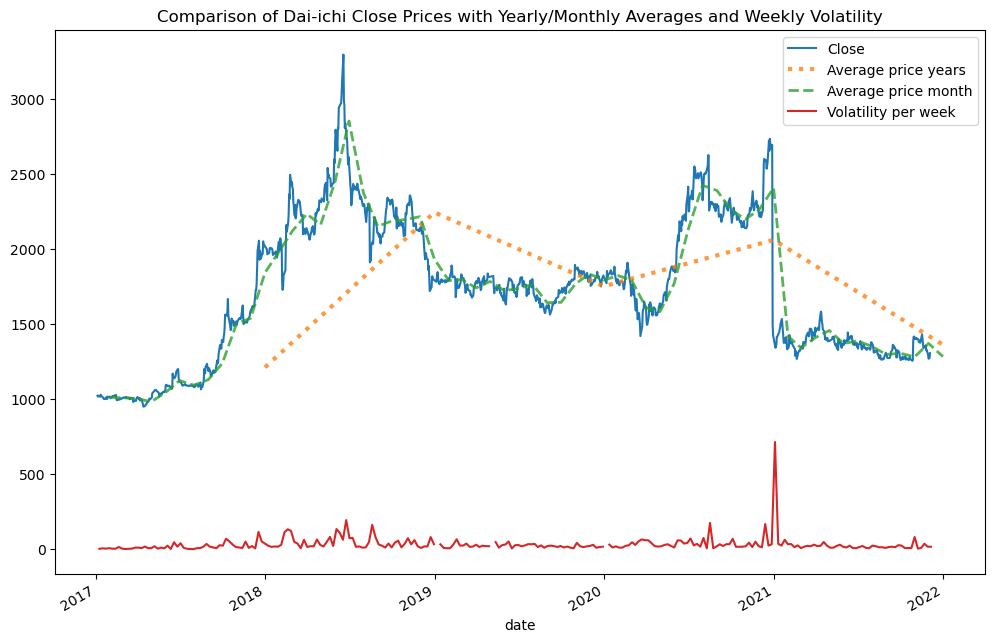

In [37]:
df_max["Close"].plot(figsize=(12,8))
df_max["Close"].resample('Y').mean().plot(label = 'Average price years', lw=3, ls=':', alpha=0.8)
df_max["Close"].resample('M').mean().plot(label = 'Average price month', lw=2, ls='--', alpha=0.8)
df_max["Close"].resample('W').std().plot(label = 'Volatility per week')
plt.legend()
plt.title("Comparison of Dai-ichi Close Prices with Yearly/Monthly Averages and Weekly Volatility")
plt.show()

In [38]:
pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


/Users/clara-marie/anaconda3/lib/python3.11/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


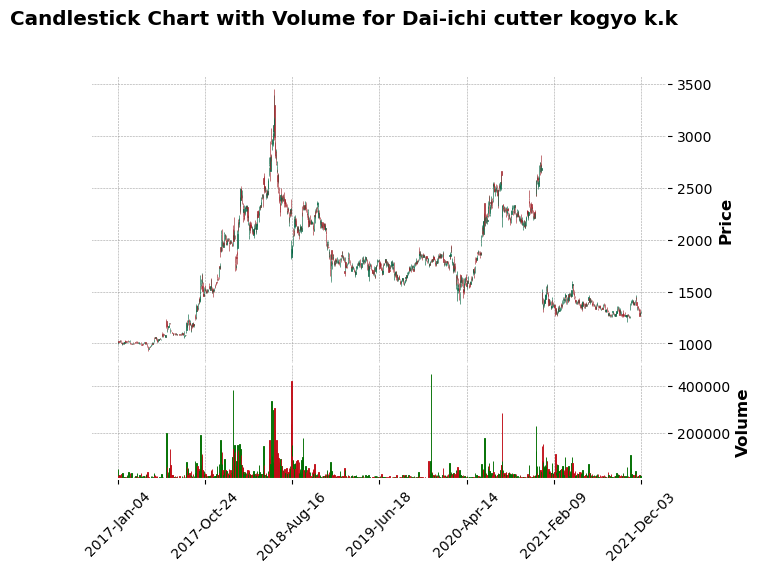

In [39]:
import mplfinance as mpf
#plot a candlestick chart with a volume pane to represent the financial data of Dai-ichi cutter kogyo k.k. 
 
Graph1 =mpf.plot(df_max, type='candle', style='charles', title='Candlestick Chart with Volume for Dai-ichi cutter kogyo k.k ', ylabel='Price', volume=True)

For the financial investigation , we're working on the return investisment.A return, in its simplest terms, is the money made or lost on an investment over some period of time.

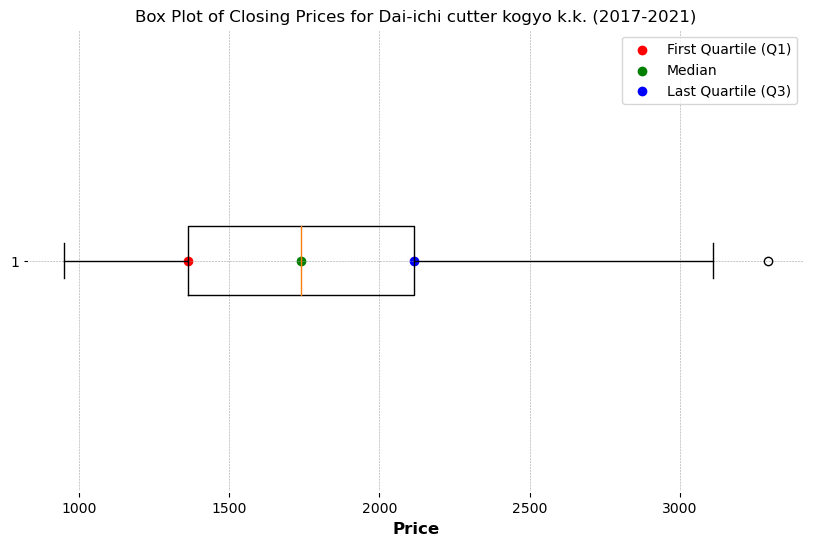

In [40]:
# Calculate quartiles
Q1 = df_max['Close'].quantile(0.25)
median = df_max['Close'].quantile(0.5)
Q3 = df_max['Close'].quantile(0.75)

# Creating the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_max['Close'], vert=False)

# Highlight the quartiles and median
plt.scatter(Q1, 1, color='red', label='First Quartile (Q1)')
plt.scatter(median, 1, color='green', label='Median')
plt.scatter(Q3, 1, color='blue', label='Last Quartile (Q3)')

# Adding labels and title
plt.title('Box Plot of Closing Prices for Dai-ichi cutter kogyo k.k. (2017-2021)')
plt.xlabel('Price')
plt.legend()

# Show the plot
plt.show()

In [41]:
df_max["return_day"] = (df_max["Close"]/df_max["Close"].shift(1)) - 1 
df_max

,SecuritiesCode,Name,SectorName,RowId,Date,Open,High,Low,Close,Volume,month,year,return_day
date,,,,,,,,,,,,,
2017-01-04,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20170104_1716,2017-01-04,998.0,1024.0,998.0,1023.0,42600,1,2017,NaN
2017-01-05,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20170105_1716,2017-01-05,1019.0,1024.0,1014.0,1017.0,13600,1,2017,-0.005865
2017-01-06,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20170106_1716,2017-01-06,1021.0,1026.0,1019.0,1022.0,17700,1,2017,0.004916
2017-01-10,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20170110_1716,2017-01-10,1019.0,1020.0,1011.0,1016.0,17500,1,2017,-0.005871
2017-01-11,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20170111_1716,2017-01-11,1012.0,1034.0,1012.0,1030.0,14200,1,2017,0.013780
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20211129_1716,2021-11-29,1314.0,1334.0,1293.0,1296.0,18900,11,2021,-0.023361
2021-11-30,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20211130_1716,2021-11-30,1289.0,1332.0,1269.0,1269.0,16300,11,2021,-0.020833
2021-12-01,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20211201_1716,2021-12-01,1299.0,1299.0,1271.0,1272.0,16300,12,2021,0.002364


In [42]:
#replace nul value by 0 
df_max = df_max.fillna(0)
df_max

,SecuritiesCode,Name,SectorName,RowId,Date,Open,High,Low,Close,Volume,month,year,return_day
date,,,,,,,,,,,,,
2017-01-04,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20170104_1716,2017-01-04,998.0,1024.0,998.0,1023.0,42600,1,2017,0.000000
2017-01-05,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20170105_1716,2017-01-05,1019.0,1024.0,1014.0,1017.0,13600,1,2017,-0.005865
2017-01-06,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20170106_1716,2017-01-06,1021.0,1026.0,1019.0,1022.0,17700,1,2017,0.004916
2017-01-10,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20170110_1716,2017-01-10,1019.0,1020.0,1011.0,1016.0,17500,1,2017,-0.005871
2017-01-11,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20170111_1716,2017-01-11,1012.0,1034.0,1012.0,1030.0,14200,1,2017,0.013780
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20211129_1716,2021-11-29,1314.0,1334.0,1293.0,1296.0,18900,11,2021,-0.023361
2021-11-30,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20211130_1716,2021-11-30,1289.0,1332.0,1269.0,1269.0,16300,11,2021,-0.020833
2021-12-01,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20211201_1716,2021-12-01,1299.0,1299.0,1271.0,1272.0,16300,12,2021,0.002364


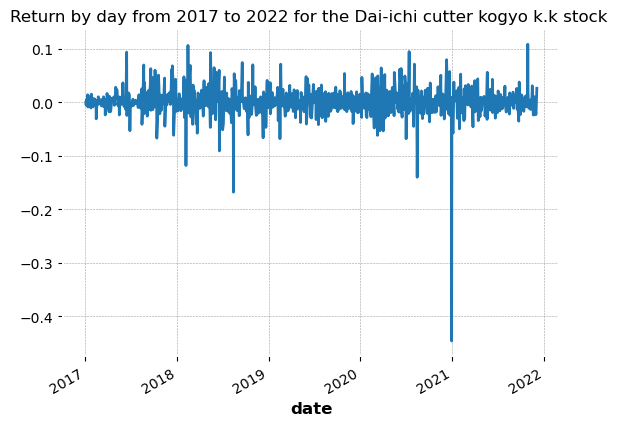

In [43]:
df_max["return_day"].plot()
plt.title("Return by day from 2017 to 2022 for the Dai-ichi cutter kogyo k.k stock ")
plt.show()

In [44]:
df_max['Cumulative Return'] = (1 + df_max['return_day']).cumprod()
df_max

,SecuritiesCode,Name,SectorName,RowId,Date,Open,High,Low,Close,Volume,month,year,return_day,Cumulative Return
date,,,,,,,,,,,,,,
2017-01-04,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20170104_1716,2017-01-04,998.0,1024.0,998.0,1023.0,42600,1,2017,0.000000,1.000000
2017-01-05,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20170105_1716,2017-01-05,1019.0,1024.0,1014.0,1017.0,13600,1,2017,-0.005865,0.994135
2017-01-06,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20170106_1716,2017-01-06,1021.0,1026.0,1019.0,1022.0,17700,1,2017,0.004916,0.999022
2017-01-10,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20170110_1716,2017-01-10,1019.0,1020.0,1011.0,1016.0,17500,1,2017,-0.005871,0.993157
2017-01-11,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20170111_1716,2017-01-11,1012.0,1034.0,1012.0,1030.0,14200,1,2017,0.013780,1.006843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20211129_1716,2021-11-29,1314.0,1334.0,1293.0,1296.0,18900,11,2021,-0.023361,1.266862
2021-11-30,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20211130_1716,2021-11-30,1289.0,1332.0,1269.0,1269.0,16300,11,2021,-0.020833,1.240469
2021-12-01,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20211201_1716,2021-12-01,1299.0,1299.0,1271.0,1272.0,16300,12,2021,0.002364,1.243402


Text(0.5, 1.0, 'Cumulative return between for the Dai-ichi cutter kogyo k.k stock between 2017 to 2022')

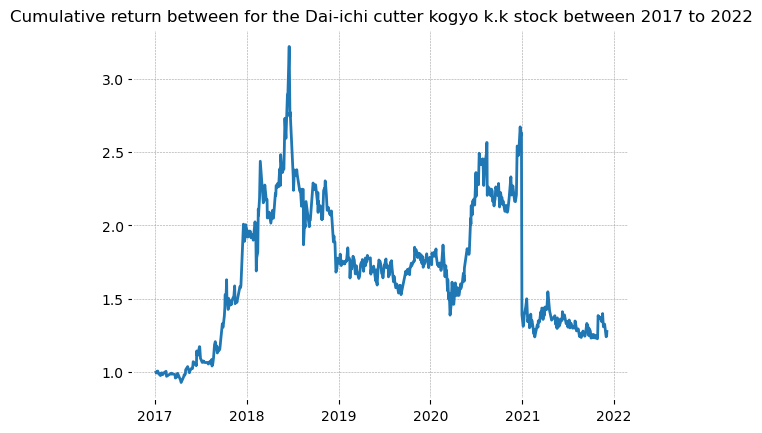

In [45]:
plt.plot(df_max["Date"], df_max["Cumulative Return"])
plt.title("Cumulative return between for the Dai-ichi cutter kogyo k.k stock between 2017 to 2022")

In [46]:
#show the day of the cumultative return is the higher , so the  the moment when the close price was the highest over several days
df_max[df_max["Cumulative Return"] == df_max["Cumulative Return"].max()]

,SecuritiesCode,Name,SectorName,RowId,Date,Open,High,Low,Close,Volume,month,year,return_day,Cumulative Return
date,,,,,,,,,,,,,,
2018-06-18,1716,Dai-ichi cutter kogyo k.k.,Construction & materials,20180618_1716,2018-06-18,3180.0,3400.0,3105.0,3295.0,274100,6,2018,0.059486,3.220919


In [47]:
#Create a new parameter : productivity based on the return by day
df_max['productivity'] = df_max['return_day'].apply(lambda x: 1 if x > 0 else 0)
df_ml = df_max.drop(['SecuritiesCode', 'SectorName','month', 'year', 'RowId'], axis=1)
df_ml

,Name,Date,Open,High,Low,Close,Volume,return_day,Cumulative Return,productivity
date,,,,,,,,,,
2017-01-04,Dai-ichi cutter kogyo k.k.,2017-01-04,998.0,1024.0,998.0,1023.0,42600,0.000000,1.000000,0
2017-01-05,Dai-ichi cutter kogyo k.k.,2017-01-05,1019.0,1024.0,1014.0,1017.0,13600,-0.005865,0.994135,0
2017-01-06,Dai-ichi cutter kogyo k.k.,2017-01-06,1021.0,1026.0,1019.0,1022.0,17700,0.004916,0.999022,1
2017-01-10,Dai-ichi cutter kogyo k.k.,2017-01-10,1019.0,1020.0,1011.0,1016.0,17500,-0.005871,0.993157,0
2017-01-11,Dai-ichi cutter kogyo k.k.,2017-01-11,1012.0,1034.0,1012.0,1030.0,14200,0.013780,1.006843,1
...,...,...,...,...,...,...,...,...,...,...
2021-11-29,Dai-ichi cutter kogyo k.k.,2021-11-29,1314.0,1334.0,1293.0,1296.0,18900,-0.023361,1.266862,0
2021-11-30,Dai-ichi cutter kogyo k.k.,2021-11-30,1289.0,1332.0,1269.0,1269.0,16300,-0.020833,1.240469,0
2021-12-01,Dai-ichi cutter kogyo k.k.,2021-12-01,1299.0,1299.0,1271.0,1272.0,16300,0.002364,1.243402,1


We create two news columns 
"return_day_-1" stores the returns from the previous day, while "return_day_-2" stores the returns from two days ago.
Creating these columns generally makes it possible to perform comparative analyzes and build predictive models, using past returns to estimate or predict future returns on a financial asset. These lags can help explore temporal dependency relationships between successive values in a time series and identify trends or patterns that could be useful in modeling or forecasting.

In [48]:
df_ml["return_day_-1"] = df_max["return_day"].shift(1)
df_ml["return_day_-2"] = df_max["return_day"].shift(2)
df_ml

,Name,Date,Open,High,Low,Close,Volume,return_day,Cumulative Return,productivity,return_day_-1,return_day_-2
date,,,,,,,,,,,,
2017-01-04,Dai-ichi cutter kogyo k.k.,2017-01-04,998.0,1024.0,998.0,1023.0,42600,0.000000,1.000000,0,NaN,NaN
2017-01-05,Dai-ichi cutter kogyo k.k.,2017-01-05,1019.0,1024.0,1014.0,1017.0,13600,-0.005865,0.994135,0,0.000000,NaN
2017-01-06,Dai-ichi cutter kogyo k.k.,2017-01-06,1021.0,1026.0,1019.0,1022.0,17700,0.004916,0.999022,1,-0.005865,0.000000
2017-01-10,Dai-ichi cutter kogyo k.k.,2017-01-10,1019.0,1020.0,1011.0,1016.0,17500,-0.005871,0.993157,0,0.004916,-0.005865
2017-01-11,Dai-ichi cutter kogyo k.k.,2017-01-11,1012.0,1034.0,1012.0,1030.0,14200,0.013780,1.006843,1,-0.005871,0.004916
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29,Dai-ichi cutter kogyo k.k.,2021-11-29,1314.0,1334.0,1293.0,1296.0,18900,-0.023361,1.266862,0,0.001509,-0.023581
2021-11-30,Dai-ichi cutter kogyo k.k.,2021-11-30,1289.0,1332.0,1269.0,1269.0,16300,-0.020833,1.240469,0,-0.023361,0.001509
2021-12-01,Dai-ichi cutter kogyo k.k.,2021-12-01,1299.0,1299.0,1271.0,1272.0,16300,0.002364,1.243402,1,-0.020833,-0.023361


In [49]:
#replace nul value by 0 
df_ml = df_ml.fillna(0)
df_ml

,Name,Date,Open,High,Low,Close,Volume,return_day,Cumulative Return,productivity,return_day_-1,return_day_-2
date,,,,,,,,,,,,
2017-01-04,Dai-ichi cutter kogyo k.k.,2017-01-04,998.0,1024.0,998.0,1023.0,42600,0.000000,1.000000,0,0.000000,0.000000
2017-01-05,Dai-ichi cutter kogyo k.k.,2017-01-05,1019.0,1024.0,1014.0,1017.0,13600,-0.005865,0.994135,0,0.000000,0.000000
2017-01-06,Dai-ichi cutter kogyo k.k.,2017-01-06,1021.0,1026.0,1019.0,1022.0,17700,0.004916,0.999022,1,-0.005865,0.000000
2017-01-10,Dai-ichi cutter kogyo k.k.,2017-01-10,1019.0,1020.0,1011.0,1016.0,17500,-0.005871,0.993157,0,0.004916,-0.005865
2017-01-11,Dai-ichi cutter kogyo k.k.,2017-01-11,1012.0,1034.0,1012.0,1030.0,14200,0.013780,1.006843,1,-0.005871,0.004916
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29,Dai-ichi cutter kogyo k.k.,2021-11-29,1314.0,1334.0,1293.0,1296.0,18900,-0.023361,1.266862,0,0.001509,-0.023581
2021-11-30,Dai-ichi cutter kogyo k.k.,2021-11-30,1289.0,1332.0,1269.0,1269.0,16300,-0.020833,1.240469,0,-0.023361,0.001509
2021-12-01,Dai-ichi cutter kogyo k.k.,2021-12-01,1299.0,1299.0,1271.0,1272.0,16300,0.002364,1.243402,1,-0.020833,-0.023361


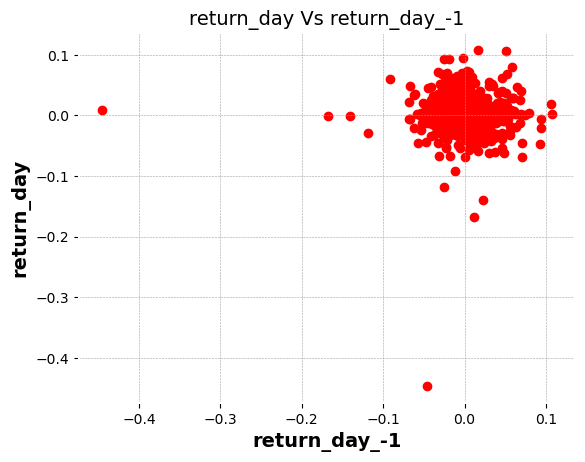

In [50]:
plt.scatter(df_ml['return_day'], df_ml['return_day_-1'], color='red')
plt.title('return_day Vs return_day_-1', fontsize=14)
plt.xlabel('return_day_-1', fontsize=14)
plt.ylabel('return_day', fontsize=14)
plt.grid(True)
plt.show()

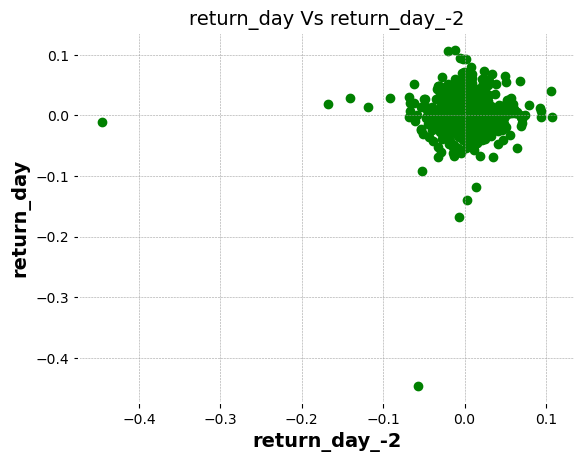

In [51]:
plt.scatter(df_ml['return_day'], df_ml['return_day_-2'], color='green')
plt.title('return_day Vs return_day_-2', fontsize=14)
plt.xlabel('return_day_-2', fontsize=14)
plt.ylabel('return_day', fontsize=14)
plt.grid(True)
plt.show()

# PART 5  - Machine Learning

## A- Logistic Regression 

This code snippet performs a logistic regression analysis using machine learning techniques on a dataset.

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

This code is a typical workflow for building a logistic regression model for classification tasks. It prepares the data, splits it into training and testing sets, trains the model, generates predictions on the test set, and evaluates the model's accuracy and precision on the test data.

In [53]:
X = df_ml[['Open','High','Low','Close','Volume','return_day_-1','return_day_-2']] 
y = df_ml['productivity']

# Preparation of splits data of modèle de regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#genereting prediction on the test set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)

#evaluate the model accuracy and precision

print('Accuracy: ', accuracy_score(y_test, pred))
print('Precision: ', precision_score(y_test, pred))

Accuracy:  0.8423236514522822
Precision:  0.8095238095238095


Across all test samples, approximately 84.23% of the predictions made by the model correctly match the actual class labels and 
about 80.95% of the time these predictions are correct.
These values are important indicators of the performance of a classification model. High accuracy and reasonable precision suggest that the model can perform well for this specific task

In [70]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

The confusion matrix is a table that allows you to visualize the performance of a classification model by comparing the model's predictions with the actual values. t provides an overall view of the model's prediction errors on the test data.

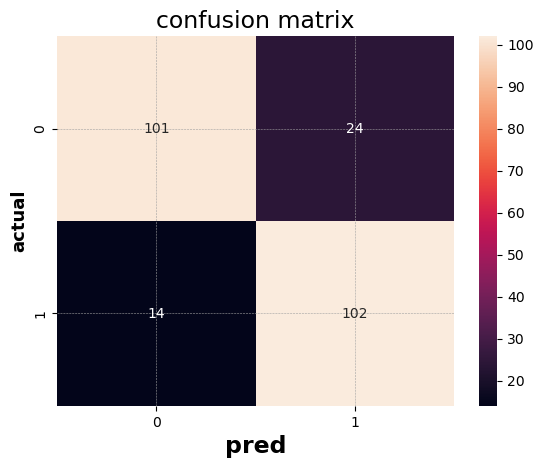

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=['0','1'],yticklabels=['0','1'])
plt.ylabel("actual",fontsize=13)
plt.xlabel("pred",fontsize=17)
plt.title('confusion matrix',fontsize=17)
plt.show()

The model correctly predicted 101 values of class '1' (True Positives) and 102 values of class '0' (True Negatives). This indicates that the model successfully identified and accurately predicted these categories.
However, there are 14 false positive predictions and 24 false negative predictions. These values indicate that the model incorrectly predicted class '1' 14 times and class '0' 24 times.

The values of True Positives and True Negatives are equal, suggesting that the model is balanced in predicting both classes.
In summary, the model shows a reasonable ability to correctly predict true values in both categories. However, there is still a non-negligible number of prediction errors, particularly in terms of false positives and false negatives, which may require attention additional to improve the accuracy of the model.

In [56]:
# Intercept   and  Coefficients: 
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
print('Intercept: \n', logistic_regression.intercept_)
print('Coefficients: \n', logistic_regression.coef_)

Intercept: 
 [-7.60510735e-06]
Coefficients: 
 [[-5.95950863e-02 -8.49732944e-04  2.73109130e-03  5.77749515e-02
   3.64348848e-06 -8.54190285e-06 -3.89503526e-06]]


These coefficients indicate the strength and direction of the impact of each feature on the prediction.
the intercept is close to zero, indicating that the probability of the target class is very close to zero when all features are zero.a positive coefficient (like 5.77749515e-02) suggests a positive relationship between that specific characteristic and the output variable. A negative coefficient (like -5.95950863e-02) suggests a negative relationship.

In [57]:
#  logit model summary via  statsmodels.api 

X= sm.add_constant(X)
logit_model = sm.Logit(y, X).fit()
print (logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.487777
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           productivity   No. Observations:                 1201
Model:                          Logit   Df Residuals:                     1193
Method:                           MLE   Df Model:                            7
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                  0.2963
Time:                        15:41:54   Log-Likelihood:                -585.82
converged:                       True   LL-Null:                       -832.47
Covariance Type:            nonrobust   LLR p-value:                2.220e-102
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3845      0.285     -1.349      0.177      -0.943       0.174
Open             -0.

The correlation matrix is a table that shows the linear relationships between different variables (features) in our data set. Each cell of the matrix indicates the degree and direction of the correlation between two variables.

/var/folders/xn/fytvlt_d4q7cgl95f5y2q98c0000gn/T/ipykernel_90886/148541419.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_ml.corr()


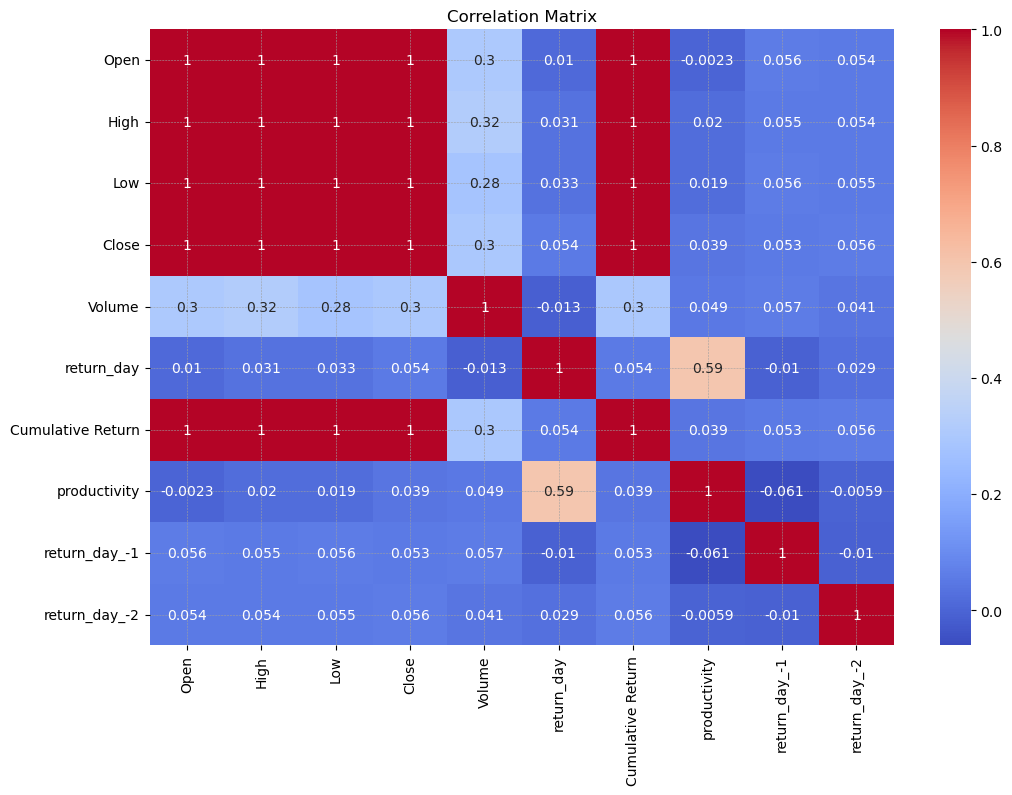

In [58]:
correlation_matrix = df_ml.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Correlation between “Return by Day -1” and “Productivity” at -0.061:
A correlation of -0.061 indicates a weak negative relationship between these two variables.
This suggests that there is an inverse trend between these variables: as the value of "Return by Day -1" increases, "Productivity" tends to decrease slightly, and vice versa.
However, the correlation of -0.061 is low, so the association between these two variables is not very strong.

Correlation between “Return by Day -2” and “Productivity” at -0.00059:

A correlation very close to zero (0) or very low (like -0.00059) indicates almost no or negligible relationship between these variables.
This means that varying “Return by Day -2” has no discernible or significant impact on “Productivity”. There is no clear or linear trend between these two variables.

## B- Random Forest

We are going to predict the productivity to comapre our model

In [59]:
# Let's see how many values are divided into good ( productivity =1) or bad( productivity =0)
sizes = df_ml['productivity'].value_counts(sort=1)
print(sizes)

1    602
0    599
Name: productivity, dtype: int64


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

X_pred = df_ml[['Open','High','Low','Close','Volume','return_day_-1','return_day_-2']]

X_train = df_ml[['Open','High','Low','Close','Volume','return_day_-1','return_day_-2']]
X_train = X_train.fillna(0)

Y_train = df_ml['productivity']
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.20, random_state =0)
model = RandomForestClassifier(n_estimators=60, random_state=40)

#fit data

model.fit(X_train, Y_train)

#Predict our dataset

Y_pred_test = model.predict(X_test)
print(Y_pred_test)
len(Y_pred_test)

[1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0
 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1
 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1
 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0]


241

In [61]:
#find our prediction accuracy
from sklearn import metrics
print("Accuracy = ", metrics.accuracy_score(Y_test, Y_pred_test))

Accuracy =  0.6514522821576764


In [62]:
#find what parameters or features occurs in our model
features_list = list(X_pred.columns)
feature_imp = pd.Series(model.feature_importances_, index=features_list).sort_values(ascending=False) 
print(feature_imp)

return_day_-1    0.155153
Open             0.149258
return_day_-2    0.148875
Volume           0.148695
Close            0.147454
Low              0.126132
High             0.124434
dtype: float64


<Axes: xlabel='Predicted', ylabel='Actual'>

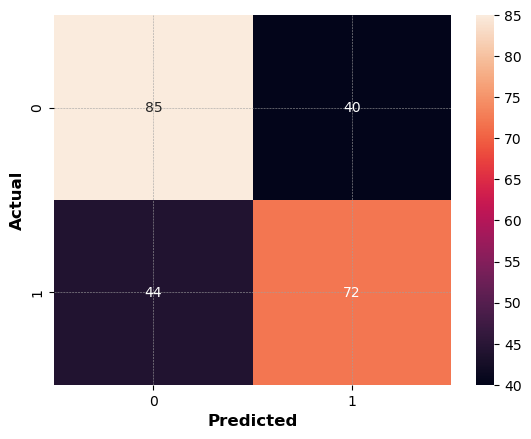

In [63]:
confusion_matrix = pd.crosstab(Y_test, Y_pred_test, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

We see that the values in each case are high, our predictive model is then not very reliable

In [90]:
Y_pred = model.predict(X_pred)
result = pd.concat([df_ml,pd.Series(Y_pred,name='productivity2')],axis=1)
result

,Name,Date,Open,High,Low,Close,Volume,return_day,Cumulative Return,productivity,return_day_-1,return_day_-2,productivity2
2017-01-04 00:00:00,Dai-ichi cutter kogyo k.k.,2017-01-04,998.0,1024.0,998.0,1023.0,42600.0,0.000000,1.000000,0.0,0.000000,0.000000,NaN
2017-01-05 00:00:00,Dai-ichi cutter kogyo k.k.,2017-01-05,1019.0,1024.0,1014.0,1017.0,13600.0,-0.005865,0.994135,0.0,0.000000,0.000000,NaN
2017-01-06 00:00:00,Dai-ichi cutter kogyo k.k.,2017-01-06,1021.0,1026.0,1019.0,1022.0,17700.0,0.004916,0.999022,1.0,-0.005865,0.000000,NaN
2017-01-10 00:00:00,Dai-ichi cutter kogyo k.k.,2017-01-10,1019.0,1020.0,1011.0,1016.0,17500.0,-0.005871,0.993157,0.0,0.004916,-0.005865,NaN
2017-01-11 00:00:00,Dai-ichi cutter kogyo k.k.,2017-01-11,1012.0,1034.0,1012.0,1030.0,14200.0,0.013780,1.006843,1.0,-0.005871,0.004916,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1197,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1198,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1199,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [93]:
sizes = result['productivity2'].value_counts(sort=1)
print(sizes)

0.0    603
1.0    598
Name: productivity2, dtype: int64


# PART 6 - Conclusion